In [ ]:
pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.9/485.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 14.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.9/21.9 MB 35.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 42.8 MB/s

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

# Charger le fichier CSV dans un DataFrame pandas
df = pd.read_csv("Nat_Gas.csv")

# Convertir la colonne 'Dates' en type datetime
df['Dates'] = pd.to_datetime(df['Dates'])

# Définir la colonne 'Dates' comme index du DataFrame
df.set_index('Dates', inplace=True)

# Afficher les 5 premières lignes du DataFrame pour vérifier que les données ont été chargées correctement
print(df.head())

# Tracer l'évolution des prix en fonction des dates
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Prices'], marker='o', linestyle='-')
plt.title('Évolution des prix du gaz naturel')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.grid(True)
plt.show()

# Créer et ajuster le modèle AutoARIMA
model = auto_arima(df['Prices'], seasonal=True, m=12)

# Résumé du modèle
print(model.summary())

# Prédire les prix du gaz naturel pour une année dans le futur
forecast = model.predict(n_periods=12)
print("Prévisions pour une année dans le futur :", forecast)

# Décomposer les séries chronologiques
decomposition = seasonal_decompose(df['Prices'], model='additive', period=12)

# Afficher les graphiques associés
plt.figure(figsize=(10, 8))

# Graphique de la série chronologique observée
plt.subplot(411)
plt.plot(df.index, decomposition.observed, label='Observé')
plt.legend()

# Graphique de la tendance
plt.subplot(412)
plt.plot(df.index, decomposition.trend, label='Tendance')
plt.legend()

# Graphique saisonnier
plt.subplot(413)
plt.plot(df.index, decomposition.seasonal, label='Saisonnier')
plt.legend()

# Graphique résiduel
plt.subplot(414)
plt.plot(df.index, decomposition.resid, label='Résiduel')
plt.legend()

plt.tight_layout()
plt.show()

# Prédire les prix du gaz naturel pour les 12 prochains mois
future_forecast = model.predict(n_periods=12)

# Ajouter les prévisions au DataFrame
df_forecast = pd.DataFrame(future_forecast, index=pd.date_range(start=df.index[-1], periods=12, freq='M'), columns=['Forecast'])

# Fusionner les données observées et les prévisions
df_merged = pd.concat([df, df_forecast])

# Afficher les données observées et les prévisions sur un graphique
plt.figure(figsize=(10, 6))
plt.plot(df_merged.index, df_merged['Prices'], label='Observé', marker='o', linestyle='-')
plt.plot(df_merged.index, df_merged['Forecast'], label='Prévision', marker='o', linestyle='--')
plt.title('Prévisions des prix du gaz naturel')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.grid(True)
plt.show()


[*********************100%%**********************]  1 of 1 completed


,Description,Value
0,Session id,3496
1,Target,Close
2,Target type,Regression
3,Original data shape,"(5073, 5)"
4,Transformed data shape,"(5073, 5)"
5,Transformed train set shape,"(4058, 5)"
6,Transformed test set shape,"(1015, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.2077,0.2002,0.4434,0.9999,0.0067,0.0054,0.9520
llar,Lasso Least Angle Regression,0.2803,0.3344,0.5733,0.9999,0.0089,0.0086,0.0210
br,Bayesian Ridge,0.2077,0.2002,0.4434,0.9999,0.0067,0.0054,0.0210
rf,Random Forest Regressor,0.2889,0.3585,0.5925,0.9999,0.0090,0.0075,1.3700
et,Extra Trees Regressor,0.2804,0.3501,0.5856,0.9999,0.0089,0.0073,0.6470
ridge,Ridge Regression,0.2078,0.2002,0.4434,0.9999,0.0067,0.0054,0.0330
lar,Least Angle Regression,0.2622,0.3317,0.5726,0.9999,0.0091,0.0071,0.0290
lightgbm,Light Gradient Boosting Machine,0.3555,0.5810,0.7505,0.9998,0.0130,0.0120,0.3630
gbr,Gradient Boosting Regressor,0.4106,0.5323,0.7229,0.9998,0.0183,0.0179,0.5420
dt,Decision Tree Regressor,0.3591,0.6277,0.7837,0.9998,0.0117,0.0094,0.0360


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Linear Regression,0.2062,0.1984,0.4454,0.9999,0.0066,0.0052


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Lasso Least Angle Regression,0.2783,0.3282,0.5729,0.9999,0.0089,0.0086


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Bayesian Ridge,0.2062,0.1984,0.4454,0.9999,0.0066,0.0052


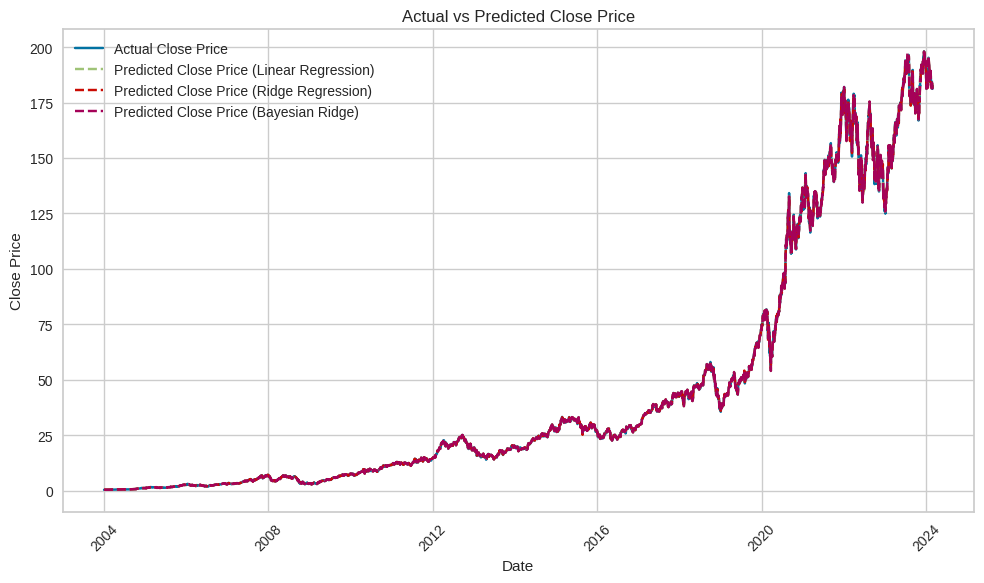

Prédiction avec le modèle Linear Regression: 181.08961684823464
Prédiction avec le modèle Ridge Regression: 181.655600003102
Prédiction avec le modèle Bayesian Ridge: 181.09004737588424


In [ ]:
import yfinance as yf
import pandas as pd
from pycaret.regression import *
import matplotlib.pyplot as plt

# Téléchargement des données d'Apple depuis Yahoo Finance
apple_data = yf.download('AAPL', start='2004-01-01', interval='1d')

# Création d'un DataFrame à partir des données téléchargées
df = pd.DataFrame(apple_data)

# Sélection des colonnes pertinentes
df = df[['Open', 'High', 'Low', 'Close', 'Volume']]

# Initialisation de l'environnement PyCaret
setup(data=df, target='Close', train_size=0.8)

# Comparaison de tous les modèles disponibles
best_models = compare_models(n_select=3)  # Sélectionnez les trois meilleurs modèles

# Entraînement des meilleurs modèles sur toutes les données disponibles
final_models = [finalize_model(model) for model in best_models]

# Prédictions sur de nouvelles données avec chaque modèle
predictions = [predict_model(model, data=df) for model in final_models]

# Obtention des noms des modèles
model_names = ["Linear Regression", "Ridge Regression", "Bayesian Ridge"]

# Affichage des prédictions des trois meilleurs modèles sur un graphique
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Close'], label='Actual Close Price')

# Affichage des prévisions pour chaque modèle avec le nom du modèle entre parenthèses
for model, pred, name in zip(final_models, predictions, model_names):
    col_name = pred.columns[-1]  # Nom de la dernière colonne
    plt.plot(df.index, pred[col_name], label=f'Predicted Close Price ({name})', linestyle='--')

plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual vs Predicted Close Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Affichage des prédictions numériques pour chaque modèle
for pred, name in zip(predictions, model_names):
    col_name = pred.columns[-1]  # Nom de la dernière colonne
    print(f"Prédiction avec le modèle {name}: {pred[col_name].iloc[-1]}")
